# Διερευνώντας τον Καιρό στην Αθήνα

# Ε1: Συγκέντρωση των Δεδομένων

Αρχικά εισάγουμε τις βιβλιοθήκες που θα χρειαστούμε

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from os import path

from plotnine import *
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine.data import mpg

Δημιουργούμε το dataframe *data* από τα δεδομένα του dataset **noaa_hellinikon_1995_2020.csv**, περνώντας της ημ/νιες σαν *DATE* και την θερμοκρασία TAVG σαν *numeric*. Αν για κάποιο λόγο τα δεδομένα στην στήλη TAVG δεν είναι στο σωστό format θα περάσουν σαν NaNs. 

In [2]:
#cwd = os.getcwd()
#cwd
data_filename = "noaa_hellinikon_1995_2020.csv"
data = pd.read_csv(data_filename, parse_dates=['DATE']) 
data['TAVG'] = pd.to_numeric(data['TAVG'], errors='coerce')
data

,STATION,NAME,DATE,TAVG
0,GR000016716,"HELLINIKON, GR",1955-01-01,NaN
1,GR000016716,"HELLINIKON, GR",1955-01-02,NaN
2,GR000016716,"HELLINIKON, GR",1955-01-03,NaN
3,GR000016716,"HELLINIKON, GR",1955-01-04,NaN
4,GR000016716,"HELLINIKON, GR",1955-01-05,NaN
...,...,...,...,...
23246,GR000016716,"HELLINIKON, GR",2020-12-27,16.6
23247,GR000016716,"HELLINIKON, GR",2020-12-28,14.8
23248,GR000016716,"HELLINIKON, GR",2020-12-29,16.3
23249,GR000016716,"HELLINIKON, GR",2020-12-30,16.4


Θα δούμε ανα έτος πόσα rows έχουμε ώστε να διαπιστώσουμε αν λείπουν δεδομένα για διάφορες ημ/νιες. Για το σκοπό αυτό προσθέτουμε μια νέα στήλη στο data frame, τη στήλη year που θα έχει μόνο την χρονολογία και θα δούμε για κάθε χρόνο πόσα rows έχουμε. Θα δούμε δηλαδή αν έχουμε 365 ή 366 μετρήσεις για κάθε χρονιά.  

In [3]:
data['year'] = data['DATE'].dt.year
yearly = data['year'].value_counts().reset_index(name = 'days')
yearly

,index,days
0,1988,366
1,1968,366
2,2008,366
3,2004,366
4,2000,366
...,...,...
61,2006,363
62,2017,342
63,2012,160
64,2014,98


Φαίνεται πως υπάρχουν χρονιές για τις οποίες δεν έχουμε για όλες τις μέρες τους data (οι μέρες τους είναι μικρότερες από 365 ή και 366). Για ποιες χρονιές πρόκειται? 

In [4]:
yearly.loc[yearly['days'] < 365] # Αν είναι μικρότερες του 365 είναι και του 366. 
                                 # Βέβαια έτσι κινδυνεύουμε να μην λάβουμε υπόψιν μια 
                                 # δίσεκτη χρονιά με 1 μέρα που δεν είχαμε μέτρηση. 

,index,days
59,2007,364
60,2018,364
61,2006,363
62,2017,342
63,2012,160
64,2014,98
65,2013,10


Μπορούμε μάλιστα να δούμε ποιες ημ/νιες είναι αυτές:

In [5]:
pd.date_range(start = '1955-01-01', end = '2020-12-31' ).difference(data.DATE)

DatetimeIndex(['2006-01-31', '2006-02-03', '2007-08-28', '2012-05-26',
               '2012-05-27', '2012-05-28', '2012-05-31', '2012-06-01',
               '2012-06-02', '2012-06-03',
               ...
               '2017-09-10', '2017-09-20', '2017-09-21', '2017-09-23',
               '2017-09-27', '2017-10-02', '2017-10-08', '2017-10-15',
               '2017-10-27', '2018-09-17'],
              dtype='datetime64[ns]', length=856, freq=None)

Βλέπουμε πως για τις χρονιές αυτές λείπουν μέρες από τα data. Για παράδειγμα, για το 2018 οπως φαίνεται και απο την προηγούμενη εντολή δεν υπάρχει η ημ/νια 2018-09-17

In [6]:
data.loc[data['DATE'] == '2018-09-17']

,STATION,NAME,DATE,TAVG,year


Θα χρησιμοποιησουμε λοιπόν και το dataset **athens.csv** για να προσθεσουμε data για αυτές τις ημ/νιες. 

Διαβάζουμε το dataset athens.csv σε ενα νεο dataframe. Επειδη υπάρχει περίπτωση κάποιες από τις τιμές της MeanTemp που μας ενδιαφέρουν να μην είναι numeric αλλά να έχουν περαστεί λάθος, θα μετατρέψουμε την στήλη αυτή σε numeric όπως κάναμε και πριν με την 'TAVG'. 

Επικεντρωνόμαστε στις στήλες TAVG και MeanTemp (καθώς και στην DATE που την εισάγουμε σαν date), επειδή αυτές θα χρειαστούν αργότερα στους υπολογισμούς μας.

In [7]:
data_filename2 = "athens.csv"
athens = pd.read_csv(data_filename2, parse_dates=['DATE'])
athens['MeanTemp'] = pd.to_numeric(athens['MeanTemp'], errors='coerce')
athens

,DATE,MeanTemp,MaxTemp,MinTemp,MeanRelHum,MaxRelHum,MinRelHum,MeanPr,MaxPr,MinPr,Raindrop,MeanAirSpeed,Direction,MaxBurst
0,2010-01-01,17.9,18.1,17.8,61.4,91,33,1003.6,1006.3,1002.0,0.2,4.0,WSW,12.7
1,2010-01-02,15.6,15.7,15.5,57.4,70,45,1005.2,1008.7,1001.5,0.0,6.8,WSW,20.7
2,2010-01-03,13.5,13.6,13.4,56.0,76,39,1011.7,1016.7,1008.6,0.0,5.0,WSW,15.4
3,2010-01-04,9.5,9.6,9.5,50.7,60,38,1021.3,1023.1,1016.8,0.0,4.3,NNE,11.0
4,2010-01-05,13.4,13.5,13.4,70.5,82,54,1018.7,1022.1,1015.5,0.0,7.9,S,19.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3647,2019-12-27,10.1,10.2,10,60.3,79,44,1018.4,1019.9,1016.8,0.0,2.9,NE,8.0
3648,2019-12-28,8.3,8.4,8.2,60.9,82,46,1016.0,1017.2,1014.2,7.2,4.3,NE,12.8
3649,2019-12-29,6.4,6.5,6.4,73.4,82,66,1017.6,1018.9,1016.5,3.4,10.6,NNE,24.5
3650,2019-12-30,4.0,4,3.9,83.9,90,65,1020.0,1024.2,1016.6,12.4,5.1,NE,15.0


θα ενώσουμε τα δύο data frames με concat για να κρατήσουμε όλες τις τιμές. Επίσης με το μέθοδο *drop_duplicates* για την στήλη DATE θα μείνουν μόνο unique dates. Με την default συμπεριφορά της drop_duplicates, τα rows που θα μείνουν θα είναι του πρώτου dataframe, δηλαδη του **data**. Επομένως για τις ημ/νιες αυτές, η μέση θερμοκρασία κάθε ημέρας θα δίνεται από την TAVG. Για της ημ/νιες που θα εισαχθούν από το athens.csv, η μέση θερμοκρασία θα έχει τις τιμές της στήλης MeanTemp του athens.csv.

Επίσης επιλέγουμε στο νέο dataframe που σχηματίζεται μόνο τις στήλες με την ημ/νια και τις μέσες τιμές για την θερμοκρασία για ευκολία αργότερα. 

In [8]:
#concat_df = pd.concat([data, athens],ignore_index=True)[['DATE','TAVG','MeanTemp']]
concat_df = pd.concat([data, athens])[['DATE','TAVG','MeanTemp']].drop_duplicates('DATE').reset_index(drop=True)
concat_df

,DATE,TAVG,MeanTemp
0,1955-01-01,NaN,NaN
1,1955-01-02,NaN,NaN
2,1955-01-03,NaN,NaN
3,1955-01-04,NaN,NaN
4,1955-01-05,NaN,NaN
...,...,...,...
24099,2017-10-02,NaN,18.7
24100,2017-10-08,NaN,17.8
24101,2017-10-15,NaN,20.4
24102,2017-10-27,NaN,17.8


Αν δούμε τώρα για την προηγούμενη ημ/νια που δεν είχαμε βρει data (2018-09-17) στο αρχικό dataframe, έχουμε τα εξής:


In [9]:
concat_df.loc[concat_df['DATE'] == '2018-09-17']

,DATE,TAVG,MeanTemp
24103,2018-09-17,NaN,26.3


Δηλαδή για την ημ/νια αυτή έχουμε πλέον μια πληροφορία για την μέση ημερίσια θερμοκρασία, από την στήλη MeanTemp. Και για μια κοινή ημ/νια που υπάρχει και στα 2 datasets: 

In [10]:
concat_df.loc[concat_df['DATE'] == '2013-02-19']

,DATE,TAVG,MeanTemp
20977,2013-02-19,12.1,NaN


Δηλαδή δεν υπάρχει διπλή εγγραφή για την ημ/νια αυτή αλλά έχει κρατηθεί η τιμή της TAVG, του αρχικού dataframe. Mπορούμε να δούμε τώρα πως μόνο για τα έτη 2006 και 2007 μας λείπουν κάποιες μέρες (προφανώς είτε δεν υπήρχαν σε κανένα από τα datasets είτε δεν εισηχθησαν λόγο *error=coerce* στις στήλες TAVG και MeanTemp).

In [11]:
DFyearly = concat_df.copy()
DFyearly['year'] = DFyearly['DATE'].dt.year
DFyearly = DFyearly['year'].value_counts().reset_index()
DFyearly.loc[DFyearly['year'] < 365]
#DFyearly

,index,year
64,2007,364
65,2006,363


Μένει να δημιουργήσουμε μια στήλη για την θερμοκρασία που θα είναι ενας συγκερασμός των στηλών TAVG και MeanTemp. O συγκερασμός θα γίνει με τέτοιο τρόπο ώστε να κρατηθούν οι τιμές της στήλης TAVG και όπου υπάρχει NaN στην στήλη αυτή θα αντικατασταθεί από την αντίστοιχη τιμή της MeanTemp.

In [12]:
concat_df['MTemp'] = concat_df['TAVG'].fillna(concat_df['MeanTemp']).astype(float)
concat_df

,DATE,TAVG,MeanTemp,MTemp
0,1955-01-01,NaN,NaN,NaN
1,1955-01-02,NaN,NaN,NaN
2,1955-01-03,NaN,NaN,NaN
3,1955-01-04,NaN,NaN,NaN
4,1955-01-05,NaN,NaN,NaN
...,...,...,...,...
24099,2017-10-02,NaN,18.7,18.7
24100,2017-10-08,NaN,17.8,17.8
24101,2017-10-15,NaN,20.4,20.4
24102,2017-10-27,NaN,17.8,17.8


Για τις δύο ημ/νιες που είδαμε πριν, μια που δεν υπήρχε στο πρώτο dataframe και μια που ήταν κοινή και στα 2, βλέπουμε πως η νέα στήλη **MTemp** έχει τις τιμές που περιμέναμε. Δηλαδή στην πρώτη περίπτωση έχει την τιμή από το athens.csv και στην δεύτερη έχει κρατήσει την τιμή της TAVG

In [13]:
concat_df.loc[concat_df['DATE'] == '2018-09-17']

,DATE,TAVG,MeanTemp,MTemp
24103,2018-09-17,NaN,26.3,26.3


In [14]:
concat_df.loc[concat_df['DATE'] == '2013-02-19']

,DATE,TAVG,MeanTemp,MTemp
20977,2013-02-19,12.1,NaN,12.1


# Ε2: Απόκλιση Καλοκαιρινών Θερμοκρασιών

Για να μπορούμε να βρούμε εύκολα μέσες τιμές ετών και περιόδων θα ομαδοποιήσουμε τα δεδομένα μας ανα ετος και ανα μηνα.
Για το σκοπό αυτό θα χωρίσουμε την στήλη DATE σε year, month, day για να μπορέσουμε να ομαδοποιήσουμε κατάλληλα.

In [15]:
concat_df['day']   = concat_df['DATE'].dt.day
concat_df['month'] = concat_df['DATE'].dt.month
concat_df['year']  = concat_df['DATE'].dt.year

In [16]:
concat_df

,DATE,TAVG,MeanTemp,MTemp,day,month,year
0,1955-01-01,NaN,NaN,NaN,1,1,1955
1,1955-01-02,NaN,NaN,NaN,2,1,1955
2,1955-01-03,NaN,NaN,NaN,3,1,1955
3,1955-01-04,NaN,NaN,NaN,4,1,1955
4,1955-01-05,NaN,NaN,NaN,5,1,1955
...,...,...,...,...,...,...,...
24099,2017-10-02,NaN,18.7,18.7,2,10,2017
24100,2017-10-08,NaN,17.8,17.8,8,10,2017
24101,2017-10-15,NaN,20.4,20.4,15,10,2017
24102,2017-10-27,NaN,17.8,17.8,27,10,2017


Στην στήλη MTemp έχουμε NaNs values που προκύψαν επειδή και η τιμή TAVG και η τιμή MeanTemp ήταν NaN για το αντίστοιχο row. Καλό θα ήταν να κάνουμε drop τις τιμές αυτές για να μην επηρεάσουν τα αποτελέσματα.

In [17]:
concat_df = concat_df.dropna(subset = ['MTemp']) 
concat_df

,DATE,TAVG,MeanTemp,MTemp,day,month,year
912,1957-07-01,22.4,NaN,22.4,1,7,1957
913,1957-07-02,26.1,NaN,26.1,2,7,1957
914,1957-07-03,25.4,NaN,25.4,3,7,1957
915,1957-07-04,26.5,NaN,26.5,4,7,1957
916,1957-07-05,28.6,NaN,28.6,5,7,1957
...,...,...,...,...,...,...,...
24099,2017-10-02,NaN,18.7,18.7,2,10,2017
24100,2017-10-08,NaN,17.8,17.8,8,10,2017
24101,2017-10-15,NaN,20.4,20.4,15,10,2017
24102,2017-10-27,NaN,17.8,17.8,27,10,2017


Μας ενδιαφέρει να βρούμε την θερμοκρασία αναφοράς που είναι η μέση ημερήσια καλοκαιρινή θερμοκρασία των ετών 1974-1999. Για να υπολογίσουμε την θερμοκρασία αναφοράς λοιπόν, θα κρατήσουμε μόνο τις χρονιές 1974-1999 και μόνο τους καλοκαιρινούς μήνες. 

In [18]:
df_reference_summer=concat_df[(concat_df['year'] >= 1974) & (concat_df['year'] <= 1999) & ((concat_df['month'] == 6) |
                                                                                           (concat_df['month'] == 7) |
                                                                                           (concat_df['month'] == 8) )]
df_reference_summer.reset_index()

,index,DATE,TAVG,MeanTemp,MTemp,day,month,year
0,7091,1974-06-01,22.7,NaN,22.7,1,6,1974
1,7092,1974-06-02,23.2,NaN,23.2,2,6,1974
2,7093,1974-06-03,22.2,NaN,22.2,3,6,1974
3,7094,1974-06-04,21.0,NaN,21.0,4,6,1974
4,7095,1974-06-05,24.0,NaN,24.0,5,6,1974
...,...,...,...,...,...,...,...,...
2381,16309,1999-08-27,24.7,NaN,24.7,27,8,1999
2382,16310,1999-08-28,24.7,NaN,24.7,28,8,1999
2383,16311,1999-08-29,25.3,NaN,25.3,29,8,1999
2384,16312,1999-08-30,25.9,NaN,25.9,30,8,1999


Με την μέθοδο describe βρίσκουμε την μέση θερμοκρασία για όλους τους καλοκαιρινούς μήνες στο διάστημα 1974-1999. Αυτή είναι 26,2 βαθμοί κελσίου. 

In [19]:
df_reference_summer['MTemp'].describe()

count    2386.000000
mean       26.232146
std         2.605857
min        16.200000
25%        24.700000
50%        26.400000
75%        27.900000
max        34.500000
Name: MTemp, dtype: float64

Για κάθε χρονιά από το αρχίκο dataframe θα κρατήσουμε μόνο τους καλοκαιρινούς μήνες, για να υπολογίσουμε την διαφορά της μέσης θερμοκρασίας του καλοκαιριού κάθε χρονιάς με την θερμοκρασία αναφοράς (που είναι η μέση καλοκαιρινή θερμοκρασία για το διάστημα 1974-1999), δημιουργώντας το dataframe *df_summer*

In [20]:
df_summer=concat_df[((concat_df['month'] == 6) | (concat_df['month'] == 7) | (concat_df['month'] == 8) )]
df_summer.reset_index()

,index,DATE,TAVG,MeanTemp,MTemp,day,month,year
0,912,1957-07-01,22.4,NaN,22.4,1,7,1957
1,913,1957-07-02,26.1,NaN,26.1,2,7,1957
2,914,1957-07-03,25.4,NaN,25.4,3,7,1957
3,915,1957-07-04,26.5,NaN,26.5,4,7,1957
4,916,1957-07-05,28.6,NaN,28.6,5,7,1957
...,...,...,...,...,...,...,...,...
5476,24087,2017-08-14,NaN,28.9,28.9,14,8,2017
5477,24088,2017-08-15,NaN,29.0,29.0,15,8,2017
5478,24089,2017-08-19,NaN,30.4,30.4,19,8,2017
5479,24090,2017-08-21,NaN,28.2,28.2,21,8,2017


Προσθέτουμε μια νέα στήλη *Diff* στο dataframe *df_summer* που έχει τις διαφορές των μέσων τιμών ανα καλοκαιρινο μήνα για το διάστημα 1974-1999 
με την θερμοκρασια αναφορας

In [21]:
df_summer['Diff'] = df_summer['MTemp'] - 26.2
df_summer.reset_index()
#concat_df['MTemp']

C:\Users\apmou\AppData\Local\Temp\ipykernel_6052\2304537179.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,index,DATE,TAVG,MeanTemp,MTemp,day,month,year,Diff
0,912,1957-07-01,22.4,NaN,22.4,1,7,1957,-3.8
1,913,1957-07-02,26.1,NaN,26.1,2,7,1957,-0.1
2,914,1957-07-03,25.4,NaN,25.4,3,7,1957,-0.8
3,915,1957-07-04,26.5,NaN,26.5,4,7,1957,0.3
4,916,1957-07-05,28.6,NaN,28.6,5,7,1957,2.4
...,...,...,...,...,...,...,...,...,...
5476,24087,2017-08-14,NaN,28.9,28.9,14,8,2017,2.7
5477,24088,2017-08-15,NaN,29.0,29.0,15,8,2017,2.8
5478,24089,2017-08-19,NaN,30.4,30.4,19,8,2017,4.2
5479,24090,2017-08-21,NaN,28.2,28.2,21,8,2017,2.0


Δημιουργούμε ένα νέο dataframe (*grouped_summer_ref*) με στήλες τα χρόνια, την μέση καλοκαιρινή θερμοκρασία κάθε χρονιάς, την διαφορά της από την θερμοκρασία αναφοράς και τον κυλιόμενο μέσο όρο δέκα ετών (για την μέση καλοκαιρινή θερμοκρασία) τον οποίο και υπολογίζουμε.  

In [22]:
grouped_summer = df_summer.groupby(['year']) #,'month'])
grouped_summer_ref = grouped_summer['MTemp'].mean().reset_index()
grouped_summer_ref['Diff'] = grouped_summer_ref['MTemp'] - 26.2
grouped_summer_ref['10yRolling'] = grouped_summer_ref['Diff'].rolling(10,min_periods=1).mean()
#grouped_summer_ref['10yRollingBack'] = grouped_summer_ref['Diff'].rolling(10).mean().shift(-10)
#grouped_summer_ref['10yRolling'] = grouped_summer_ref['10yRolling'].fillna(0)
#grouped_summer_ref['10yRollingBack'] = grouped_summer_ref['10yRollingBack'].fillna(0)
#grouped_summer_ref['10yRollsum'] = grouped_summer_ref['10yRolling'] + grouped_summer_ref['10yRollingBack'] 
grouped_summer_ref

,year,MTemp,Diff,10yRolling
0,1957,28.091935,1.891935,1.891935
1,1958,27.081522,0.881522,1.386729
2,1961,26.654348,0.454348,1.075935
3,1962,27.520652,1.320652,1.137114
4,1963,27.574725,1.374725,1.184636
5,1964,26.344565,0.144565,1.011291
6,1965,26.515217,0.315217,0.911852
7,1966,27.028261,0.828261,0.901403
8,1967,26.685870,0.485870,0.855233
9,1968,25.692391,-0.507609,0.718949


In [23]:
#grouped_summer_ref['Diff'] = grouped_summer_ref['MTemp'] - 26.2
#grouped_summer_ref

Στο παρακάτω διάγραμμα βλέπουμε την διαφορά αυτή (την διαφορά δηλαδή της μέσης καλοκαιρινής θερμοκρασίας για κάθε έτος με την θερμοκρασία αναφοράς) καθώς και τον κυλιόμενο μέσο όρο δέκα ετών:

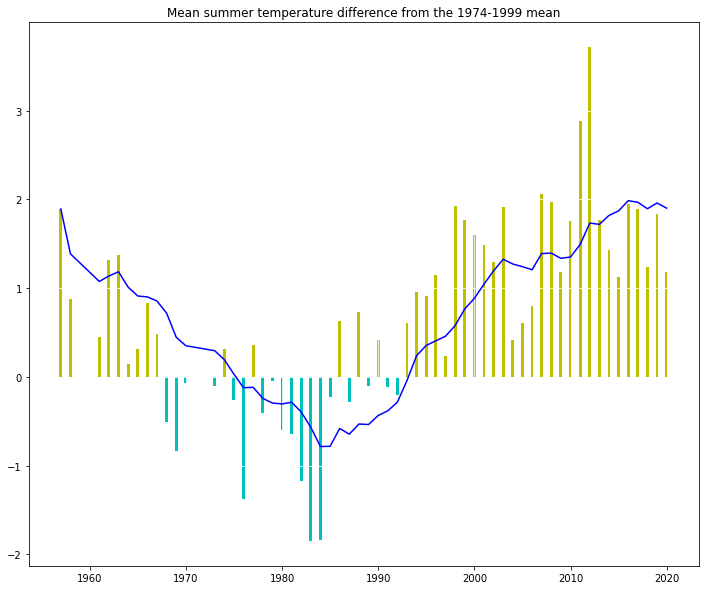

In [24]:
#ggplot(grouped_summer_ref, aes(x = 'year', y = 'Diff')) +\
#                           geom_col(stat ="identity", width=.2)  

## plt.plot ##
# Figure Size
fig = plt.figure(figsize =(12, 10))
# colormap
colors = np.where(grouped_summer_ref['Diff'] > 0, 'y','c')
# Mean year line Plot
plt.bar(grouped_summer_ref.year, grouped_summer_ref.Diff, width = 0.3, color = colors) 
# Mean reference line Plot
plt.plot(grouped_summer_ref['year'], grouped_summer_ref['10yRolling'], color = 'b')

plt.grid(color = 'w')
plt.title('Mean summer temperature difference from the 1974-1999 mean')

plt.show()
## plt.plot ##

Φαίνεται πως η μέση καλοκαιρινή θερμοκρασία πριν το 1992 ήταν σχετικά χαμηλή αλλά μετά ξεκίνησε να ανεβαίνει. Τα έτη μετά το 2004 φαίνεται πως είναι πιο θερμά και μάλιστα υπάρχουν 8 έτη για τα οποία η διαφορά ήταν μεγαλύτερη του 1,5 βαθμών Κελσίου. 



# Ε3: Εξέλιξη Ημερήσιων Θερμοκρασιών

Παρακάτω θα δημιουργήσουμε το γράφημα με τη μέση θερμοκρασία κάθε ημέρας για κάθε έτος εξομαλυμένο με ένα κυλιόμενο παράθυρο 30 ημερών (30 days rolling average). 

Στο γράφημα θα προστεθεί και μια γραμμή που θα δείχνει τη μέση θερμοκρασία αναφοράς κάθε ημέρας για την περίοδο 1974-1999 . Η γραμμή αυτή έχει επίσης εξομαλυνθεί με ένα κυλιόμενο παράθυρο 30 ημερών

In [25]:
concat_df = concat_df.sort_values(by="DATE")
concat_df

,DATE,TAVG,MeanTemp,MTemp,day,month,year
912,1957-07-01,22.4,NaN,22.4,1,7,1957
913,1957-07-02,26.1,NaN,26.1,2,7,1957
914,1957-07-03,25.4,NaN,25.4,3,7,1957
915,1957-07-04,26.5,NaN,26.5,4,7,1957
916,1957-07-05,28.6,NaN,28.6,5,7,1957
...,...,...,...,...,...,...,...
23246,2020-12-27,16.6,NaN,16.6,27,12,2020
23247,2020-12-28,14.8,NaN,14.8,28,12,2020
23248,2020-12-29,16.3,NaN,16.3,29,12,2020
23249,2020-12-30,16.4,NaN,16.4,30,12,2020


Θα πάρουμε το 30 days rolling average της MTemp

In [26]:
concat_df['Rolling'] = concat_df['MTemp'].rolling(30, min_periods=1).mean()
concat_df

,DATE,TAVG,MeanTemp,MTemp,day,month,year,Rolling
912,1957-07-01,22.4,NaN,22.4,1,7,1957,22.400000
913,1957-07-02,26.1,NaN,26.1,2,7,1957,24.250000
914,1957-07-03,25.4,NaN,25.4,3,7,1957,24.633333
915,1957-07-04,26.5,NaN,26.5,4,7,1957,25.100000
916,1957-07-05,28.6,NaN,28.6,5,7,1957,25.800000
...,...,...,...,...,...,...,...,...
23246,2020-12-27,16.6,NaN,16.6,27,12,2020,14.086667
23247,2020-12-28,14.8,NaN,14.8,28,12,2020,14.153333
23248,2020-12-29,16.3,NaN,16.3,29,12,2020,14.153333
23249,2020-12-30,16.4,NaN,16.4,30,12,2020,14.193333


Θα υπολογίσουμε και την μέση θερμοκρασία αναφοράς, με rolling average 30 ημερών. 

In [27]:
df_reference = concat_df[(concat_df['year'] >= 1974) & (concat_df['year'] <= 1999)]
df_reference['Rolling'] = df_reference['MTemp'].rolling(30, min_periods=1).mean()
df_reference  

C:\Users\apmou\AppData\Local\Temp\ipykernel_6052\1823081668.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,DATE,TAVG,MeanTemp,MTemp,day,month,year,Rolling
6940,1974-01-01,11.6,NaN,11.6,1,1,1974,11.600000
6941,1974-01-02,13.7,NaN,13.7,2,1,1974,12.650000
6942,1974-01-03,12.2,NaN,12.2,3,1,1974,12.500000
6943,1974-01-04,10.8,NaN,10.8,4,1,1974,12.075000
6944,1974-01-05,9.6,NaN,9.6,5,1,1974,11.580000
...,...,...,...,...,...,...,...,...
16431,1999-12-27,15.4,NaN,15.4,27,12,1999,13.303333
16432,1999-12-28,16.9,NaN,16.9,28,12,1999,13.540000
16433,1999-12-29,15.1,NaN,15.1,29,12,1999,13.680000
16434,1999-12-30,13.4,NaN,13.4,30,12,1999,13.753333


In [28]:
#month_name = concat_df['DATE'].dt.month_name()
#month_name

([<matplotlib.axis.XTick at 0x22a0566b790>,
 [Text(1, 0, 'Jan'),
  Text(2, 0, 'Feb'),
  Text(3, 0, 'Mar'),
  Text(4, 0, 'Apr'),
  Text(5, 0, 'May'),
  Text(6, 0, 'June'),
  Text(7, 0, 'July'),
  Text(8, 0, 'Aug'),
  Text(9, 0, 'Sept'),
  Text(10, 0, 'Oct'),
  Text(11, 0, 'Nov'),
  Text(12, 0, 'Dec')])

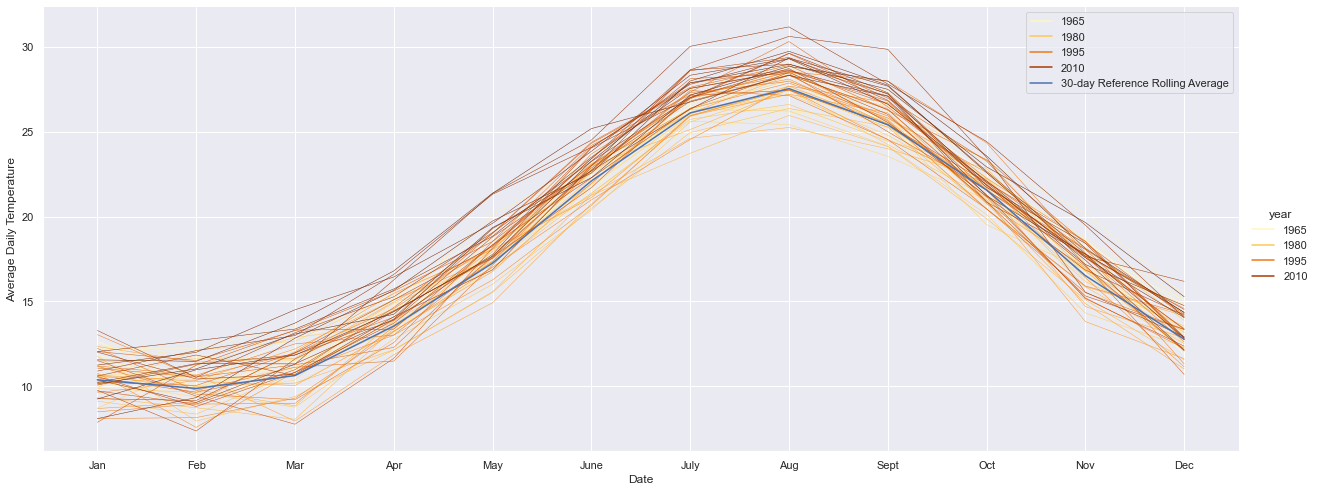

In [29]:
#sns.set_theme(style="ticks")

#palette = sns.color_palette("rocket_r")

sns.set_theme(style="darkgrid")
palette = sns.color_palette("YlOrBr", as_cmap=True)

sns.relplot(
    data=concat_df,
    x="month", y="Rolling",
    hue="year", palette = palette, 
    kind="line", 
    height=7, aspect=2.5, ci=None, facet_kws=dict(sharex=True), 
    linewidth = .5
)

sns.lineplot(x="month",y="Rolling",
             label="30-day Reference Rolling Average",
             data=df_reference,
             ci=None)

plt.xlabel("Date")
plt.ylabel("Average Daily Temperature")

plt.pos = [ 1, 2, 3, 4, 
            5, 6, 7, 8,
            9, 10, 11, 12]
  
plt.lab = [ 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 
       'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

plt.xticks( plt.pos, plt.lab)


Παρατηρούμε πως οι οι πιο σκούρες γραμμές είναι εν γένει πιο ψηλά από τον rolling μέσο όρο της θερμοκρασίας αναφοράς, που σημαίνει ότι οι μήνες τα τελευταία χρόνια είναι πιο θερμοί από τους αντίστοιχους των παλαιώτερων ετών.